In [262]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [263]:
hr = pd.read_csv("hr_attrition.csv")
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [264]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [265]:
hr.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


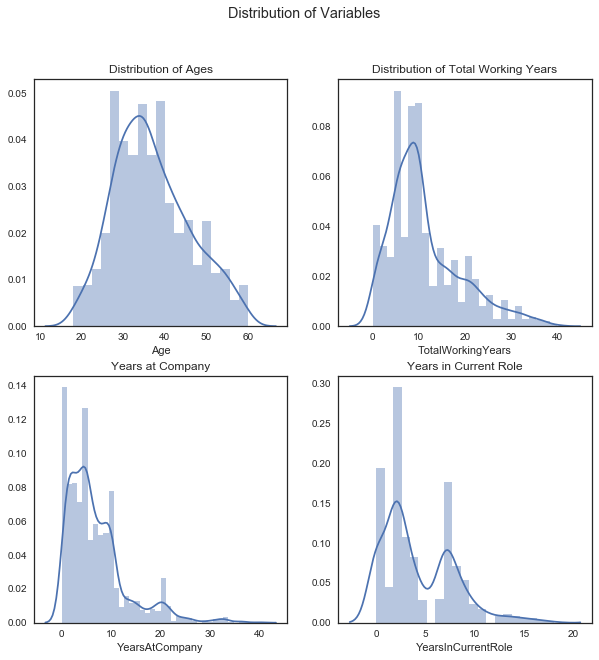

In [266]:
sns.set(style="white")
fig, ax = plt.subplots(2,2, figsize=(10,10))
plt.suptitle("Distribution of Variables")
sns.distplot(hr.Age, ax=ax[0,0])
ax[0][0].set_title("Distribution of Ages")
sns.distplot(hr.TotalWorkingYears, ax=ax[0,1])
ax[0][1].set_title("Distribution of Total Working Years")
sns.distplot(hr.YearsAtCompany, ax=ax[1,0])
ax[1][0].set_title("Years at Company")
sns.distplot(hr.YearsInCurrentRole, ax=ax[1,1])
ax[1][1].set_title("Years in Current Role")
plt.show()

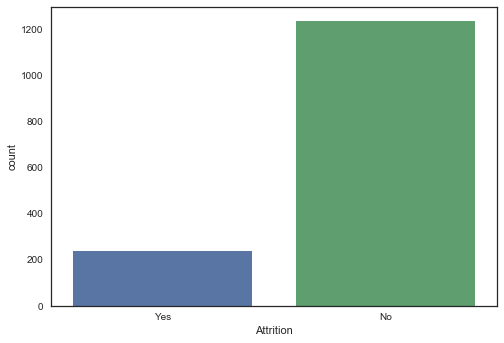

In [267]:
sns.countplot(hr.Attrition)
plt.show()

# Deal with continuous variables first

In [268]:
from numpy import median
from scipy.stats import mannwhitneyu

In [304]:
def attrition_plot(column, df):
    ax = sns.boxplot(x="Attrition", y=column, data=hr)
    plt.ylabel( "%s" % column, fontsize=14)
    yes = hr.loc[hr["Attrition"]=="Yes", column]
    no = hr.loc[hr["Attrition"]=="No", column]
    stat, p = stats.mannwhitneyu(yes, no)
    n_tests = df.shape[1]
    adjusted_alpha = 0.05/n_tests #Bonferroni correction
    ax.set_title("Test statistic: {0}, P value: {1}".format(stat, p), fontsize=14)
    if p < adjusted_alpha:
        ax.legend(labels = ["Reject H0"])
        print("Statistically significant feature: %s" % column)
    else:
            ax.legend(labels = ["Fail to reject H0"])
    return ax

In [270]:
nums = hr.select_dtypes(include=[np.number]) #extract only columns with numerical variables
nums.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2


In [271]:
#drop useless columns to reduce number of tests
nums.drop(['EmployeeCount', 'EmployeeNumber', 'StandardHours'], axis=1, inplace=True)
nums.shape

/Users/alysonweidmann/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


(1470, 23)

Statistically significant feature: Age
Statistically significant feature: DistanceFromHome
Statistically significant feature: EnvironmentSatisfaction
Statistically significant feature: JobInvolvement
Statistically significant feature: JobLevel
Statistically significant feature: JobSatisfaction
Statistically significant feature: MonthlyIncome
Statistically significant feature: StockOptionLevel
Statistically significant feature: TotalWorkingYears
Statistically significant feature: YearsAtCompany


/Users/alysonweidmann/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Statistically significant feature: YearsInCurrentRole
Statistically significant feature: YearsWithCurrManager


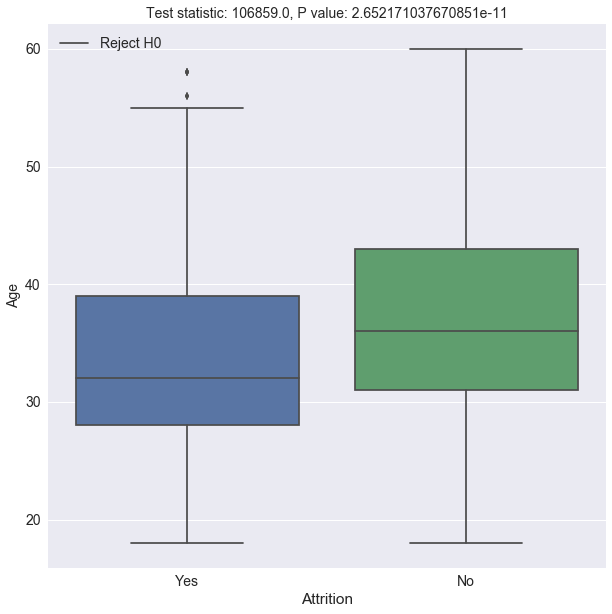

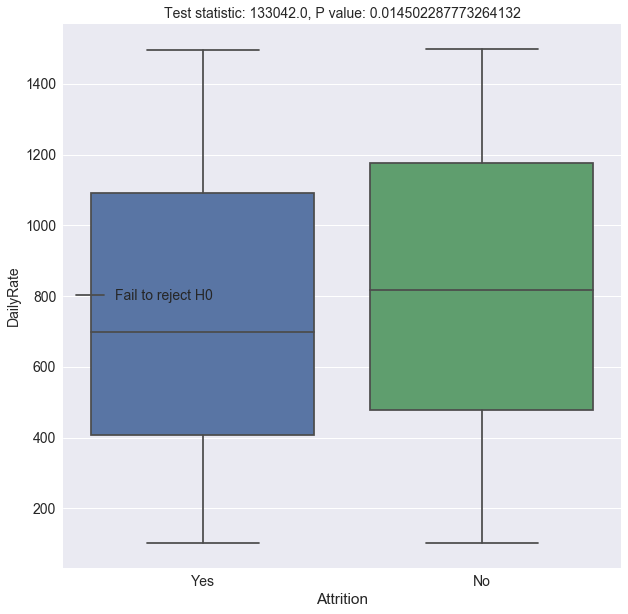

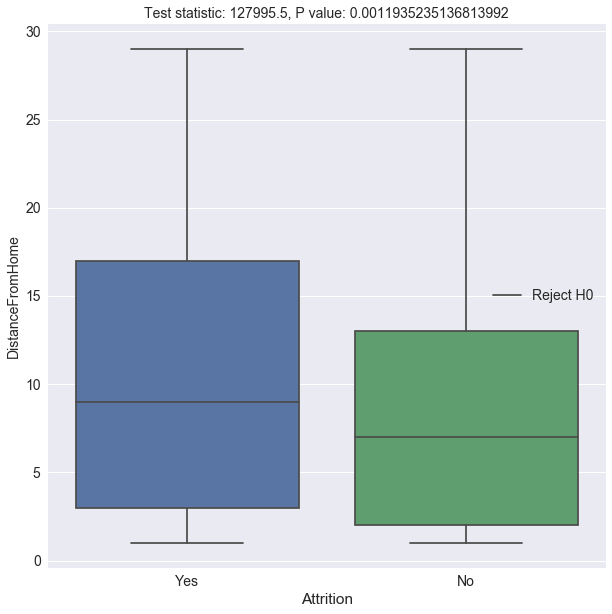

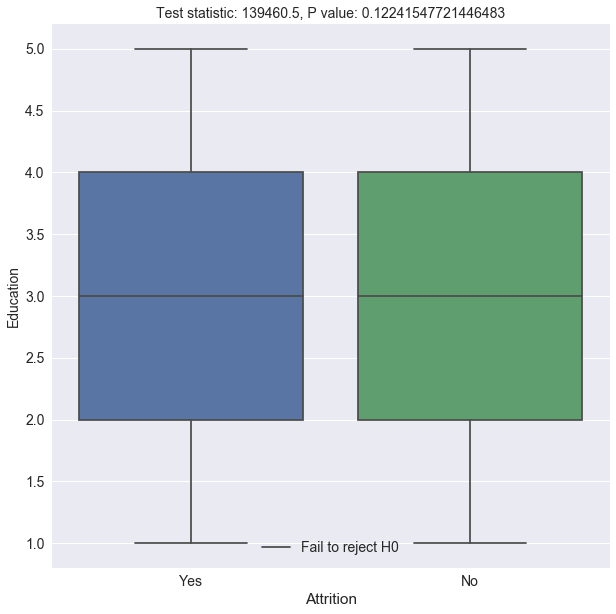

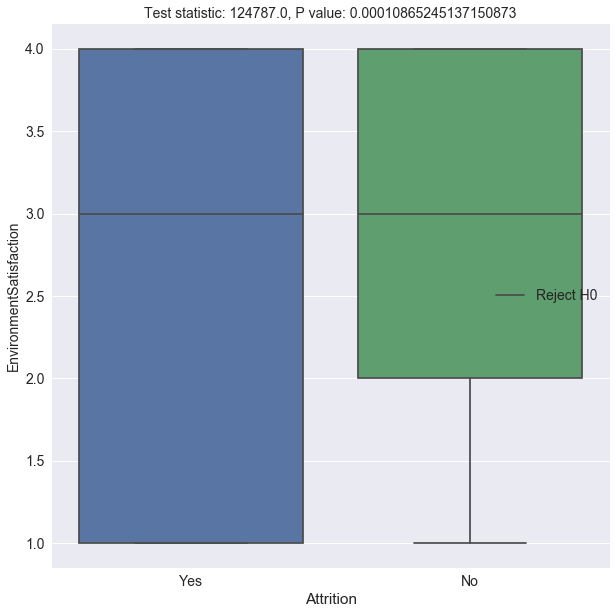

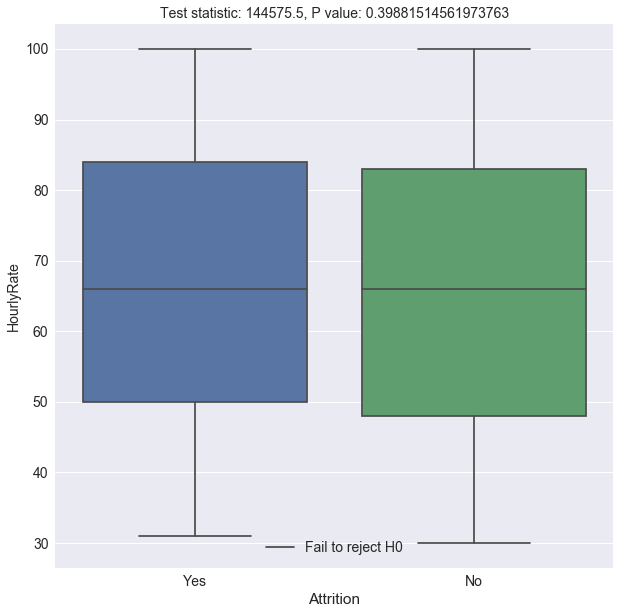

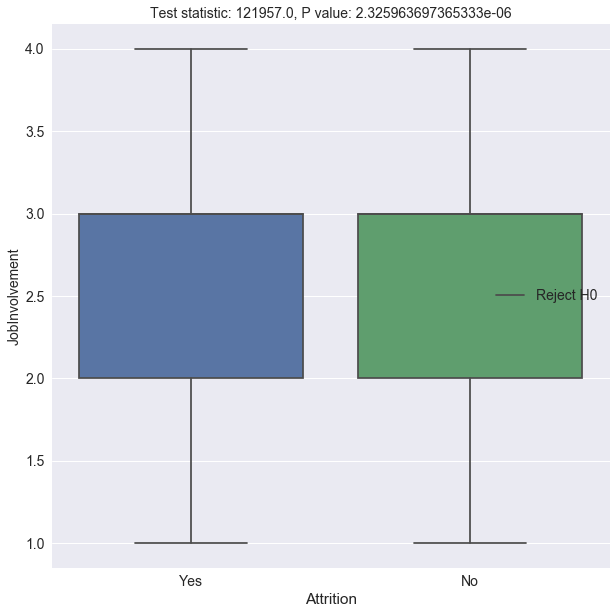

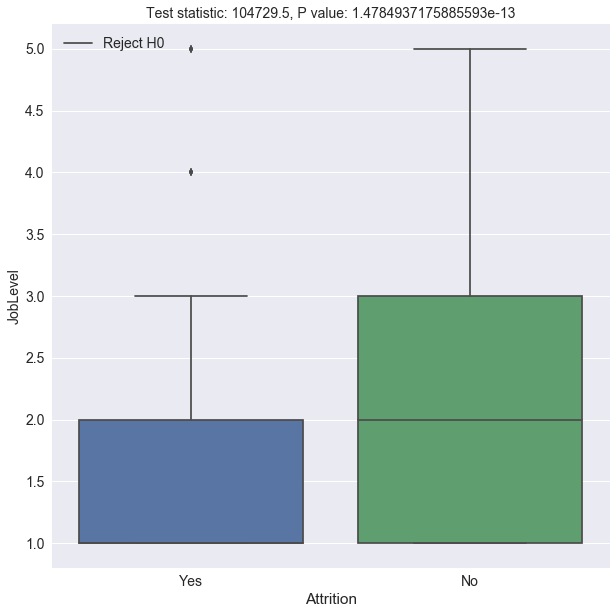

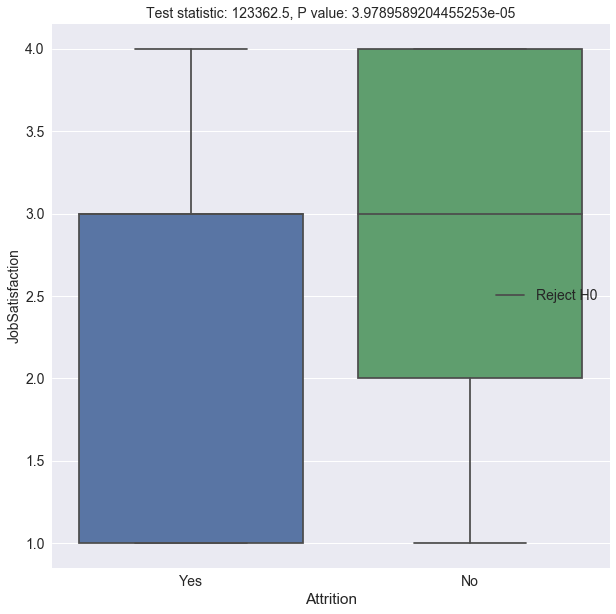

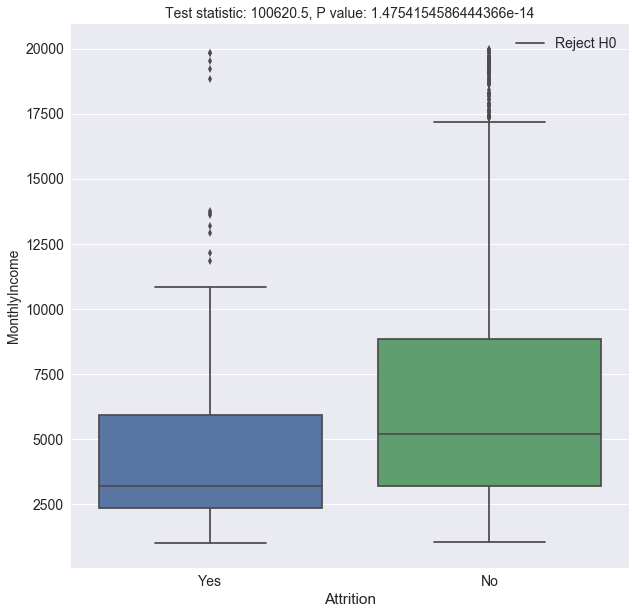

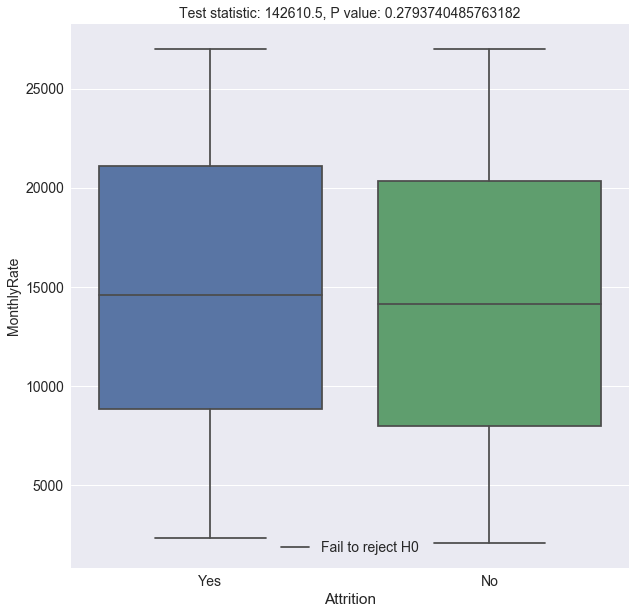

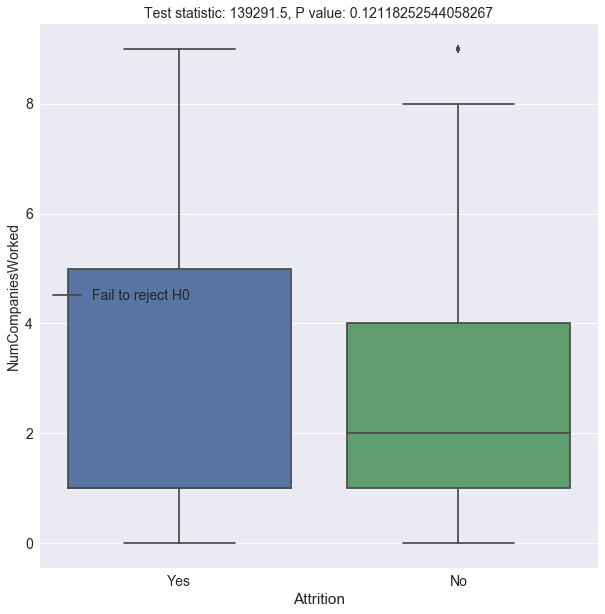

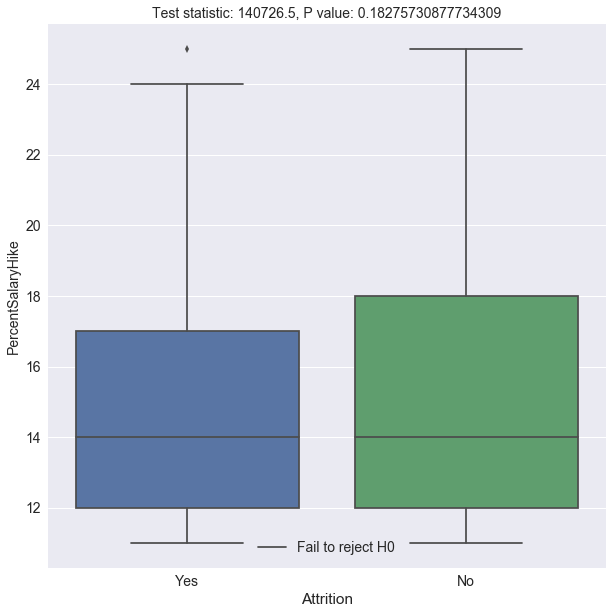

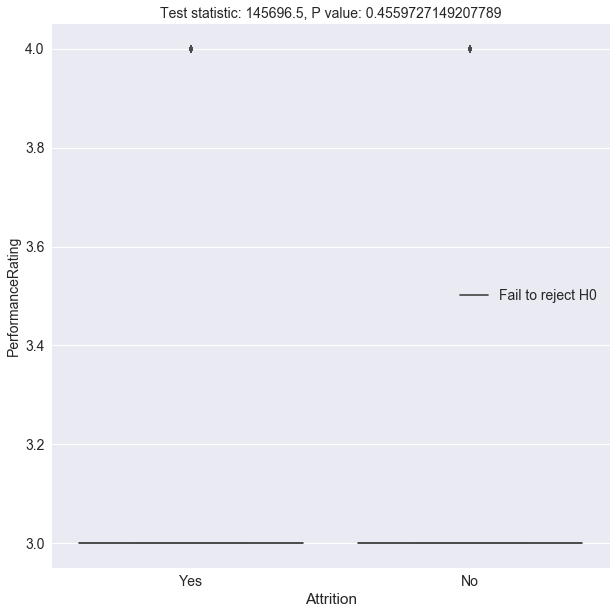

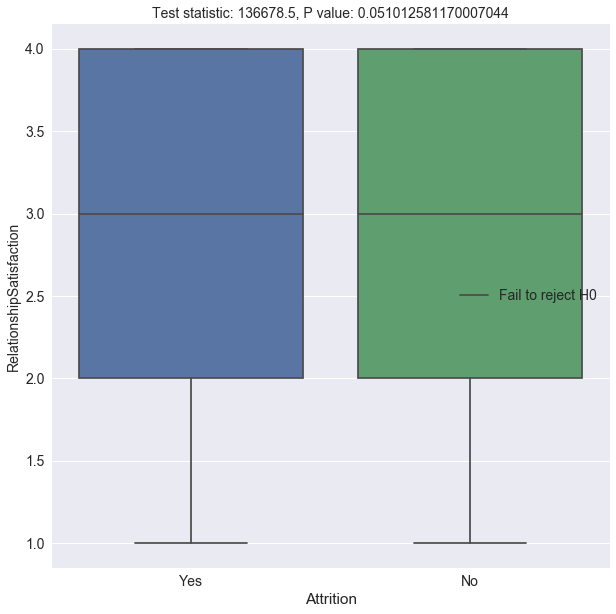

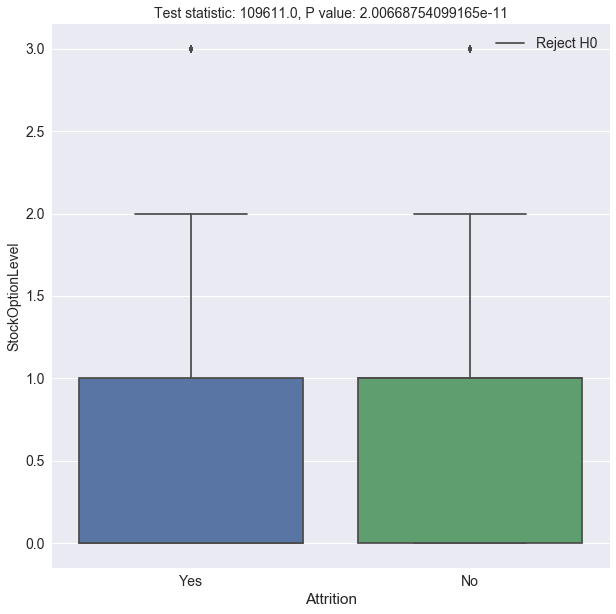

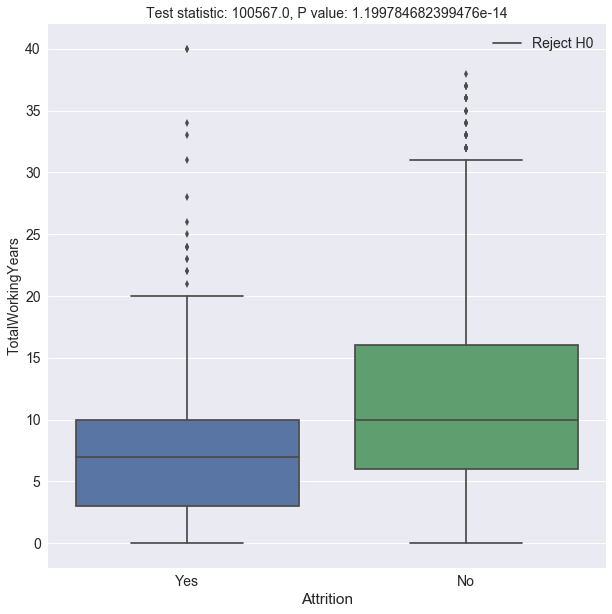

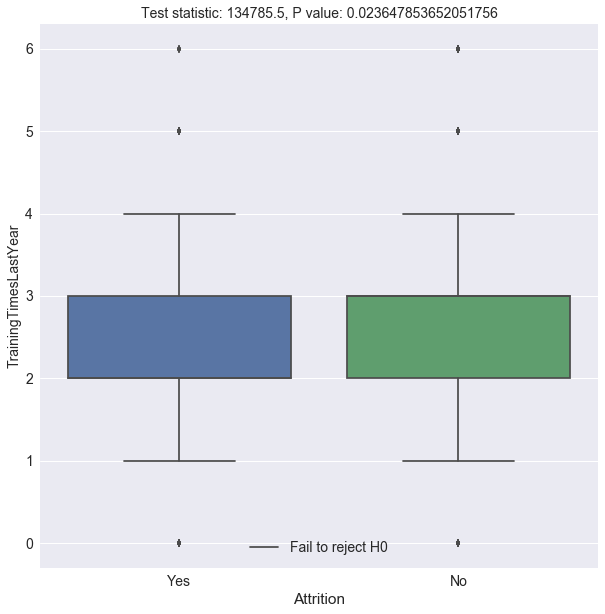

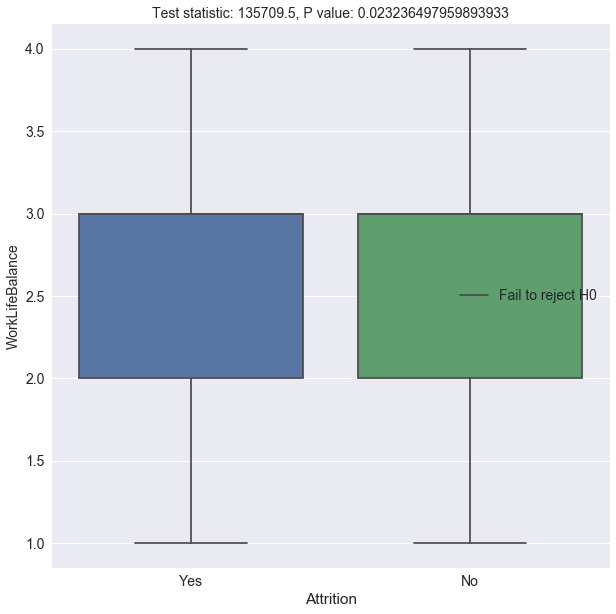

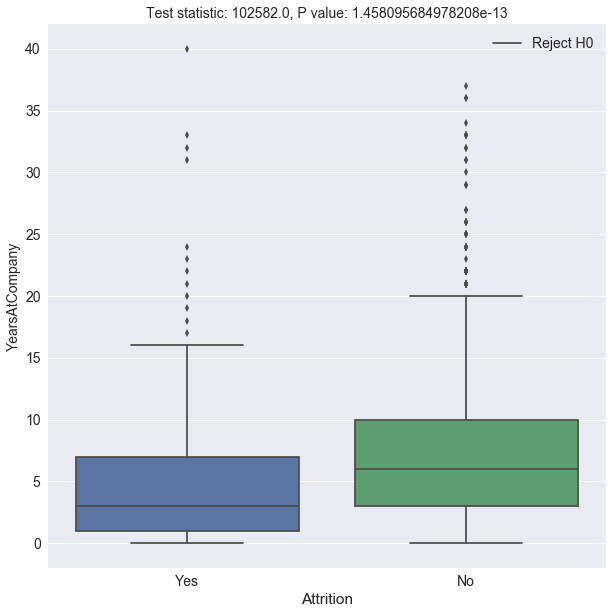

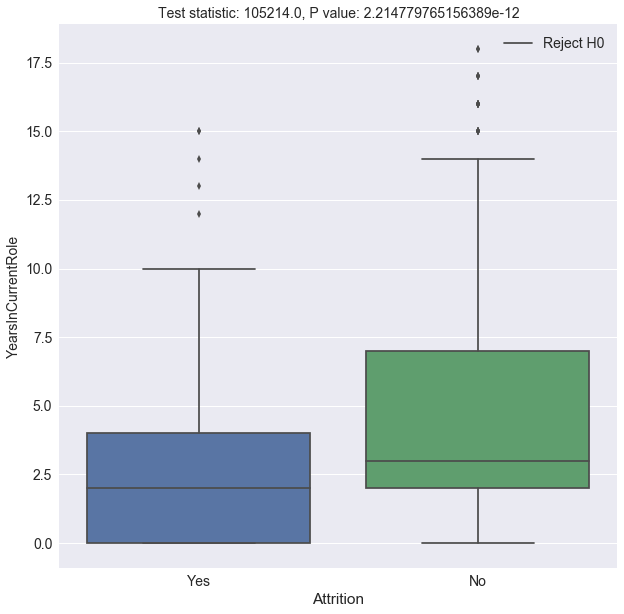

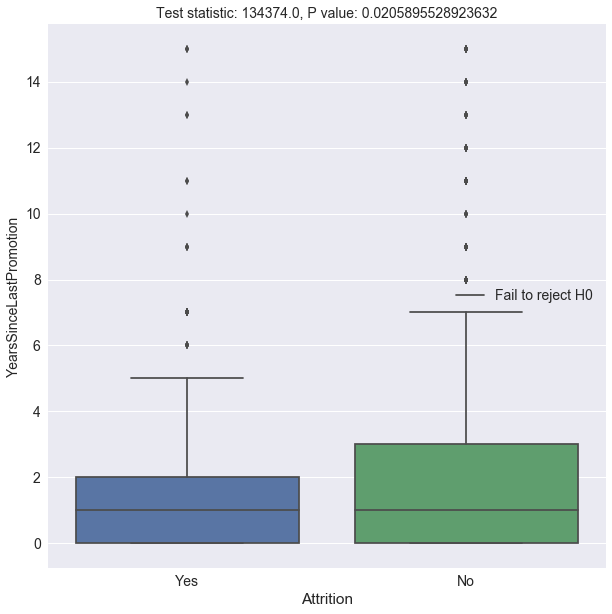

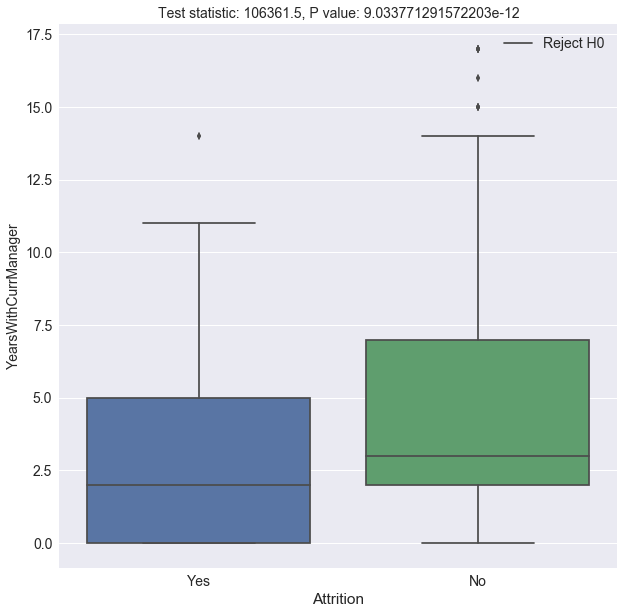

In [305]:
for column in nums: #plot attrition for each numerical variable
    fig, ax = plt.subplots(figsize=(10,10))
    attrition_plot(column, nums)

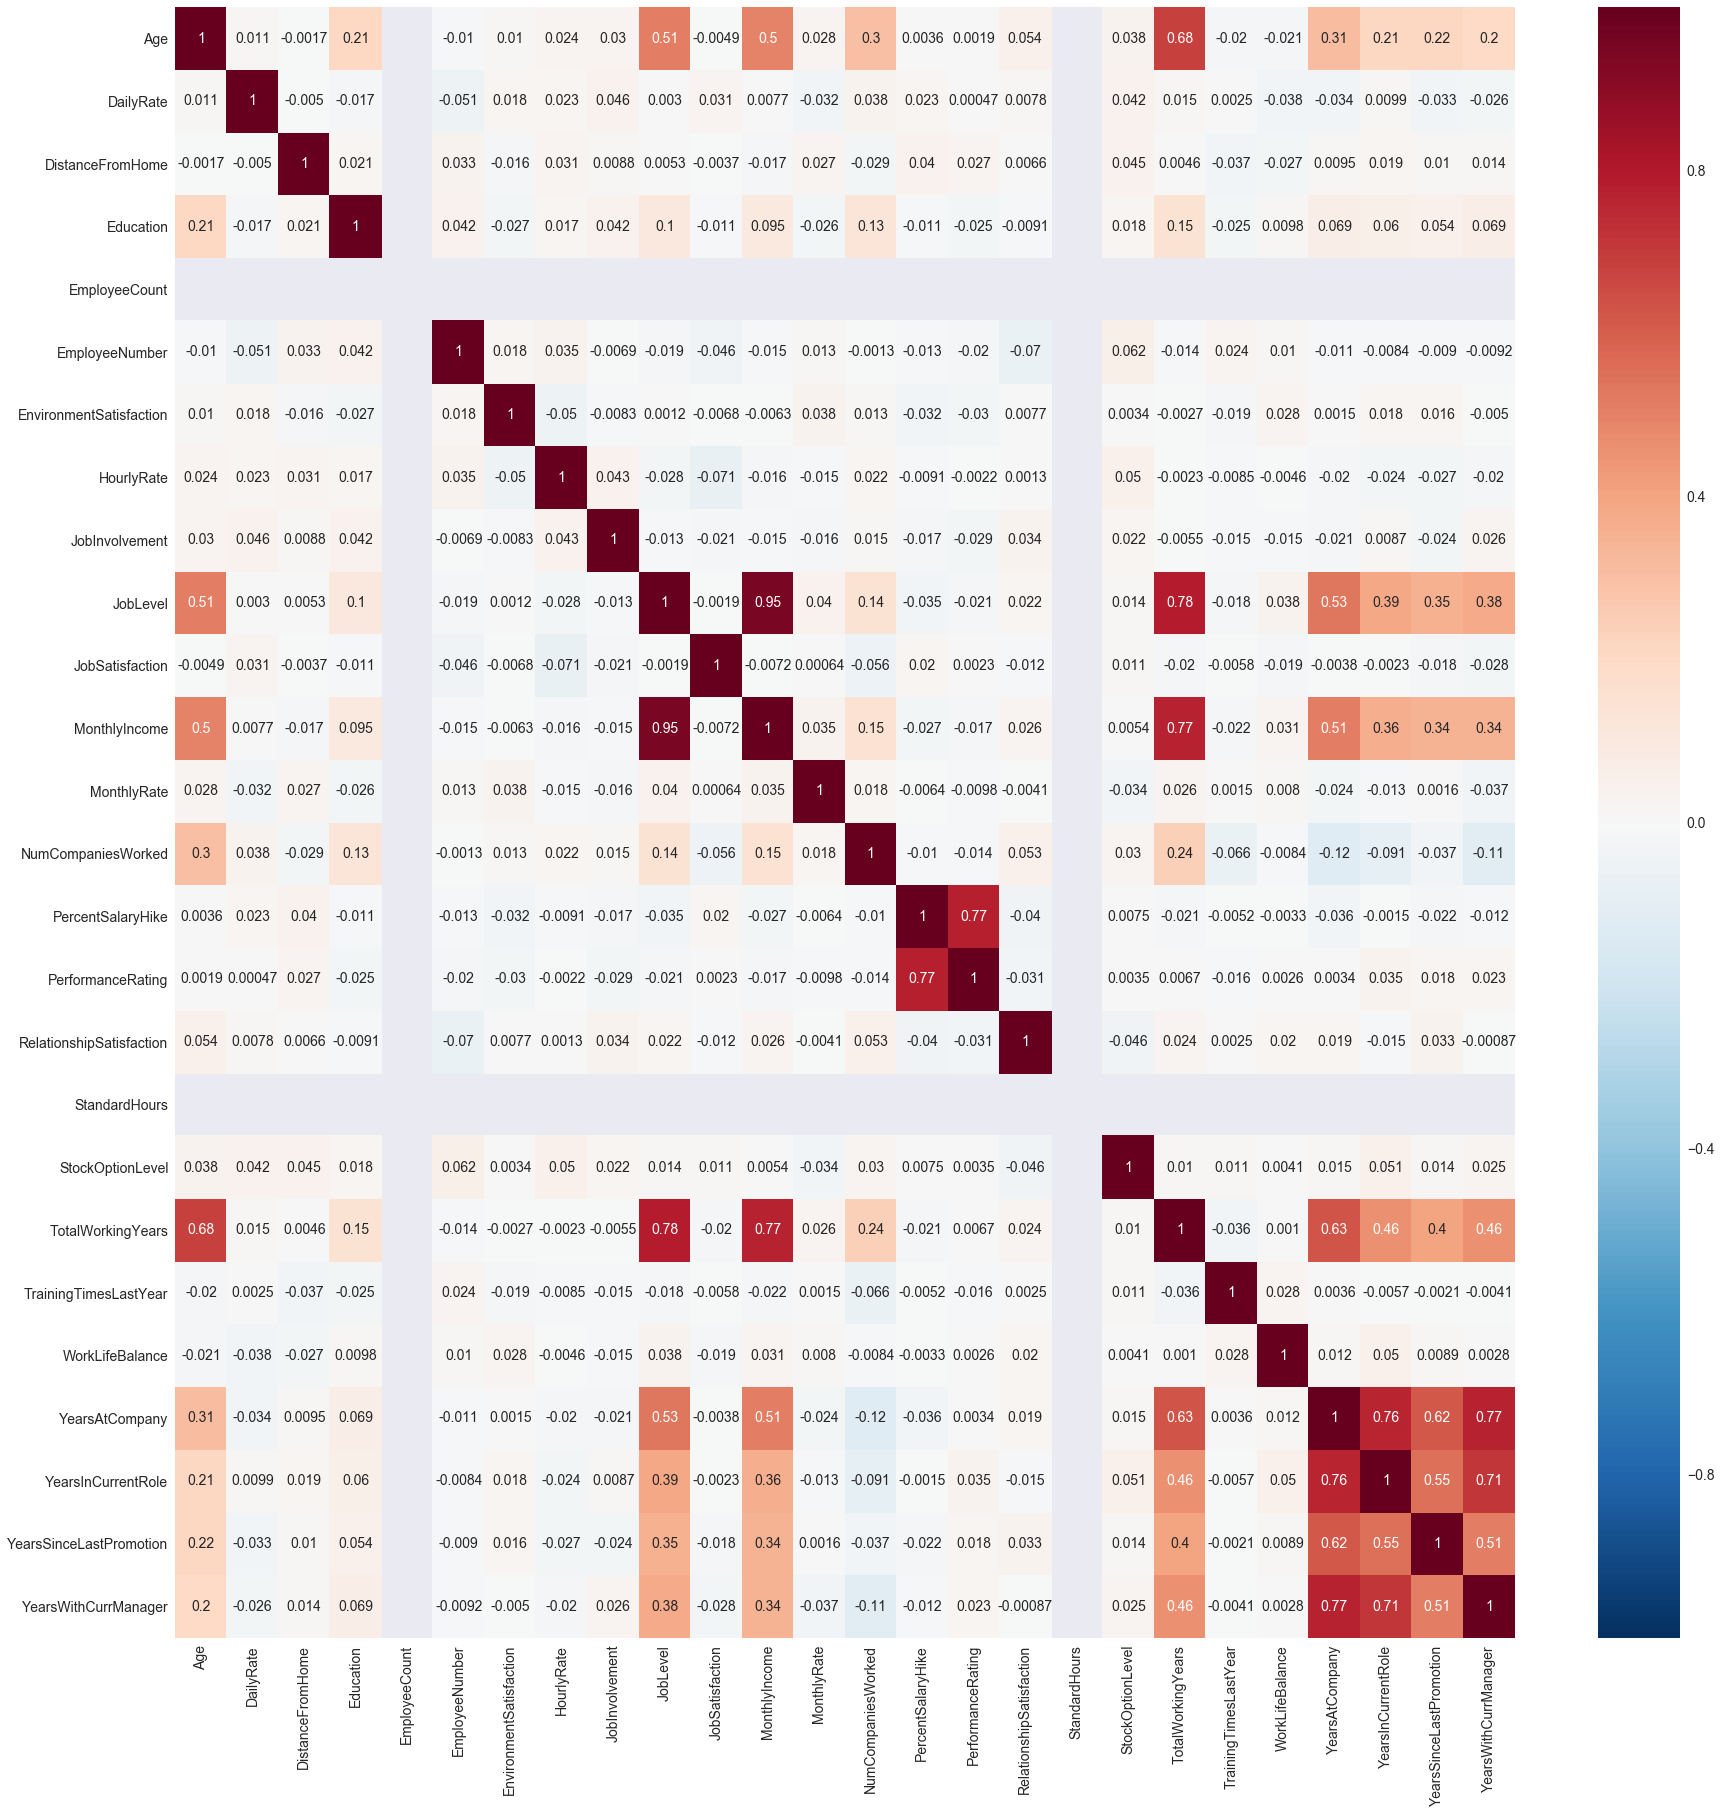

In [275]:
sns.set(font_scale=1.4)
fig, ax = plt.subplots(figsize=(30, 30))
ax = sns.heatmap(hr.corr(), annot=True, annot_kws={"size": 14})
plt.show()

In [276]:
def attrition_dist(column):
    g = sns.FacetGrid(hr, hue="Attrition")
    g = g.map(sns.distplot, column, hist=False, label=hr["Attrition"])
    plt.legend()
    return g

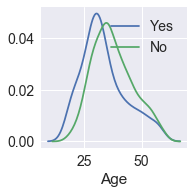

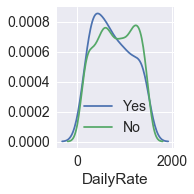

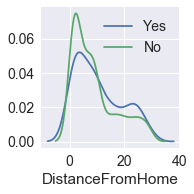

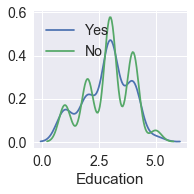

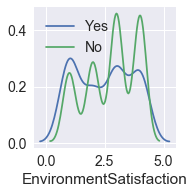

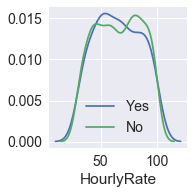

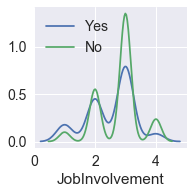

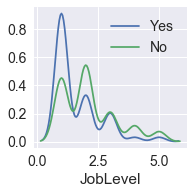

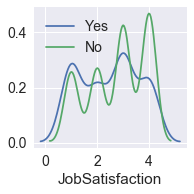

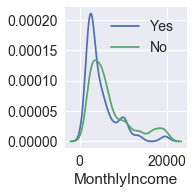

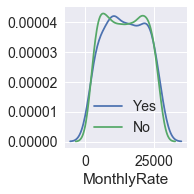

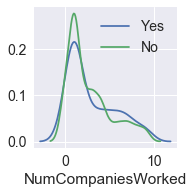

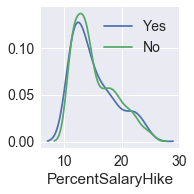

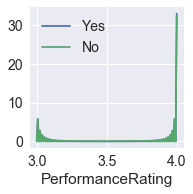

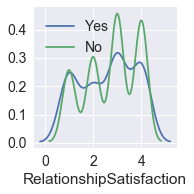

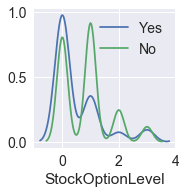

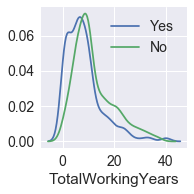

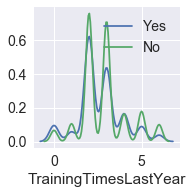

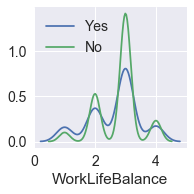

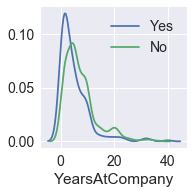

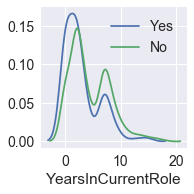

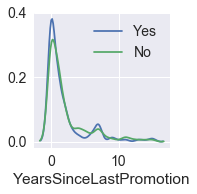

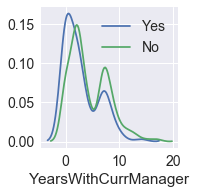

In [277]:
for column in nums:
    fig, ax = plt.subplots(figsize=(5,5))
    attrition_dist(column)
    plt.close(1)
    plt.show()

# Categorical Variables

In [278]:
cats = hr.select_dtypes(include=["object"])
cats.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [279]:
from sklearn.preprocessing import LabelEncoder

In [280]:
attrition_code = LabelEncoder()
cats["Attrition"] = attrition_code.fit_transform(cats["Attrition"])
cats.head() #1 = Yes, 0 = No

/Users/alysonweidmann/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,1,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,0,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,1,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,0,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,0,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [282]:
attrition = cats.Attrition.tolist()
travel = cats.BusinessTravel.tolist()
attrition_travel = [travel[i] for i in range(0, len(attrition)) if attrition[i] ==1]
attrition_travel

['Travel_Rarely',
 'Travel_Rarely',
 'Travel_Rarely',
 'Travel_Rarely',
 'Travel_Rarely',
 'Travel_Frequently',
 'Travel_Rarely',
 'Travel_Rarely',
 'Travel_Rarely',
 'Travel_Rarely',
 'Travel_Rarely',
 'Travel_Rarely',
 'Travel_Rarely',
 'Travel_Rarely',
 'Travel_Rarely',
 'Travel_Rarely',
 'Travel_Frequently',
 'Travel_Rarely',
 'Travel_Frequently',
 'Travel_Rarely',
 'Travel_Rarely',
 'Travel_Rarely',
 'Travel_Rarely',
 'Travel_Rarely',
 'Travel_Frequently',
 'Travel_Rarely',
 'Travel_Frequently',
 'Travel_Rarely',
 'Travel_Rarely',
 'Travel_Rarely',
 'Travel_Rarely',
 'Travel_Rarely',
 'Travel_Rarely',
 'Travel_Rarely',
 'Travel_Frequently',
 'Travel_Rarely',
 'Travel_Rarely',
 'Travel_Rarely',
 'Travel_Rarely',
 'Travel_Rarely',
 'Travel_Frequently',
 'Travel_Frequently',
 'Travel_Rarely',
 'Non-Travel',
 'Travel_Frequently',
 'Travel_Rarely',
 'Travel_Rarely',
 'Travel_Rarely',
 'Travel_Rarely',
 'Travel_Rarely',
 'Travel_Rarely',
 'Travel_Rarely',
 'Travel_Frequently',
 'Travel_

In [286]:
def plot_cat(column, n_tests):
    ax = pd.crosstab(hr[column], hr.Attrition, normalize='index').plot(kind="bar", fontsize=12)
    plt.legend(bbox_to_anchor=(1.02, 1), fontsize=12)
    cont = pd.crosstab(hr[column], hr.Attrition)
    chi2_results = stats.chi2_contingency(cont)
    chi2 = chi2_results[0]
    p_val = chi2_results[1]
    adjusted_alpha = 0.05/n_tests 
    ax.set_title("Test statistic: {0}, P value: {1}".format(chi2, p_val), fontsize=14)
    if p_val < adjusted_alpha:
        ax.legend(labels = ["Reject H0"])
        print("Statistically significant feature: %s" % column)
    else:
            ax.legend(labels = ["Fail to reject H0"])
    return ax

Statistically significant feature: Department
Statistically significant feature: BusinessTravel
Statistically significant feature: EducationField
Statistically significant feature: JobRole
Statistically significant feature: MaritalStatus
Statistically significant feature: OverTime


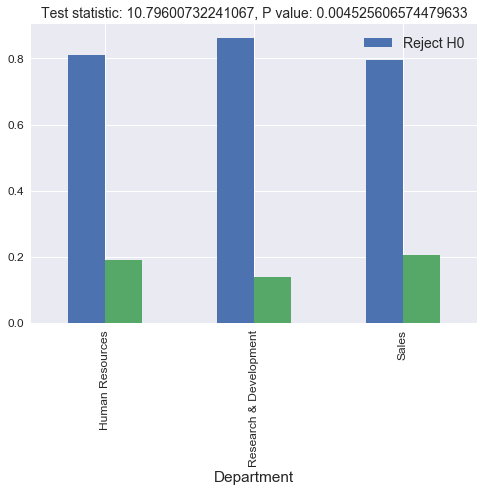

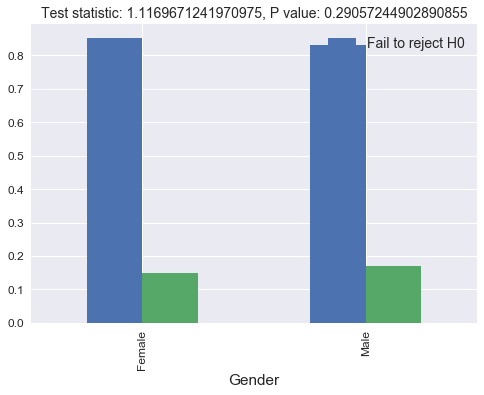

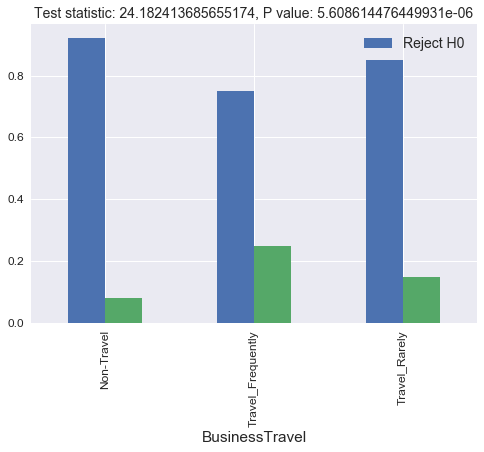

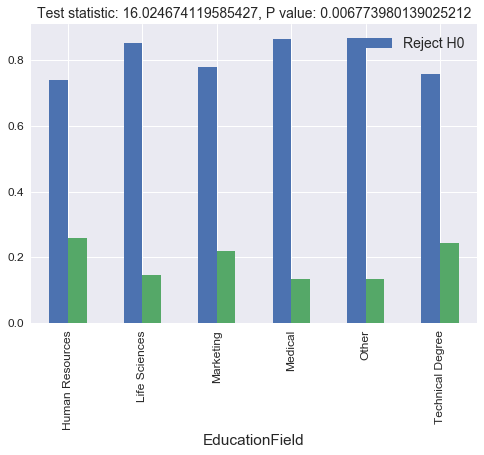

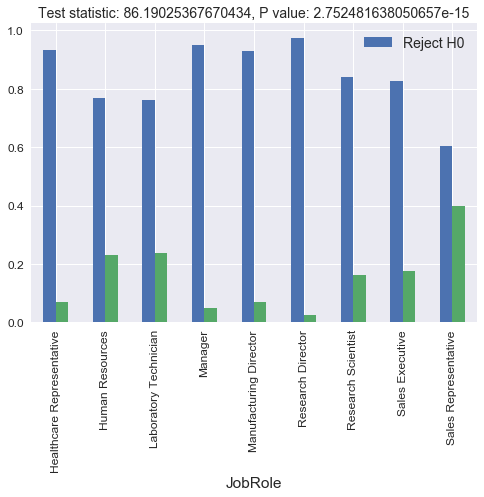

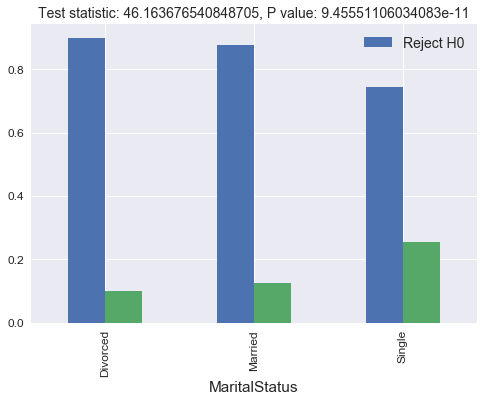

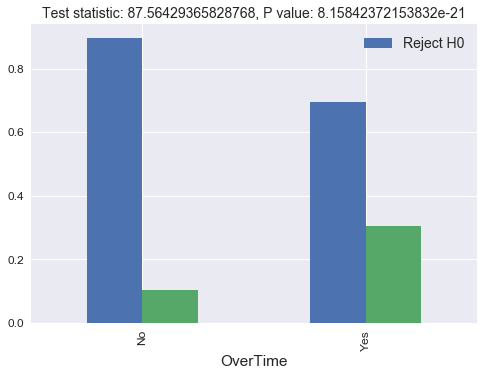

In [297]:
#Run 7 Chi2 tests
plot_cat("Department", 7)
plot_cat("Gender", 7)
plot_cat("BusinessTravel", 7)
plot_cat("EducationField", 7)
plot_cat("JobRole", 7)
plot_cat("MaritalStatus", 7)
plot_cat("OverTime", 7)

# Feature Selection

Attrition dependent upon the following variables, based on observance of a statistically significant difference between Yes and No groups:

### Continuous:

Age

DistanceFromHome

EnvironmentSatisfaction

JobInvolvement

JobLevel

JobSatisfaction

MonthlyIncome

StockOptionLevel

TotalWorkingYears

YearsAtCompany

YearsInCurrentRole


Years at Company and Years in Current Role are highly correlated, and Total Working Years is modestly correlated.

Total Working Years is highly correlated with Monthly Income, Job Level, and Age.

Job Level and Monthly Income are extremely highly correlated.


### Categorical:

Department

BusinessTravel

EducationField

JobRole

MaritalStatus

OverTime



In [298]:
hr_sig = hr[['Attrition', 'Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction',
            'MonthlyIncome', 'StockOptionLevel', 'Department', 'BusinessTravel', 'EducationField', 'JobRole',
            'MaritalStatus', 'OverTime']] #new dataframe with non-significant and colinear variables removed
hr_sig.head()

,Attrition,Age,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,StockOptionLevel,Department,BusinessTravel,EducationField,JobRole,MaritalStatus,OverTime
0,Yes,41,1,2,3,4,5993,0,Sales,Travel_Rarely,Life Sciences,Sales Executive,Single,Yes
1,No,49,8,3,2,2,5130,1,Research & Development,Travel_Frequently,Life Sciences,Research Scientist,Married,No
2,Yes,37,2,4,2,3,2090,0,Research & Development,Travel_Rarely,Other,Laboratory Technician,Single,Yes
3,No,33,3,4,3,3,2909,0,Research & Development,Travel_Frequently,Life Sciences,Research Scientist,Married,Yes
4,No,27,2,1,3,2,3468,1,Research & Development,Travel_Rarely,Medical,Laboratory Technician,Married,No


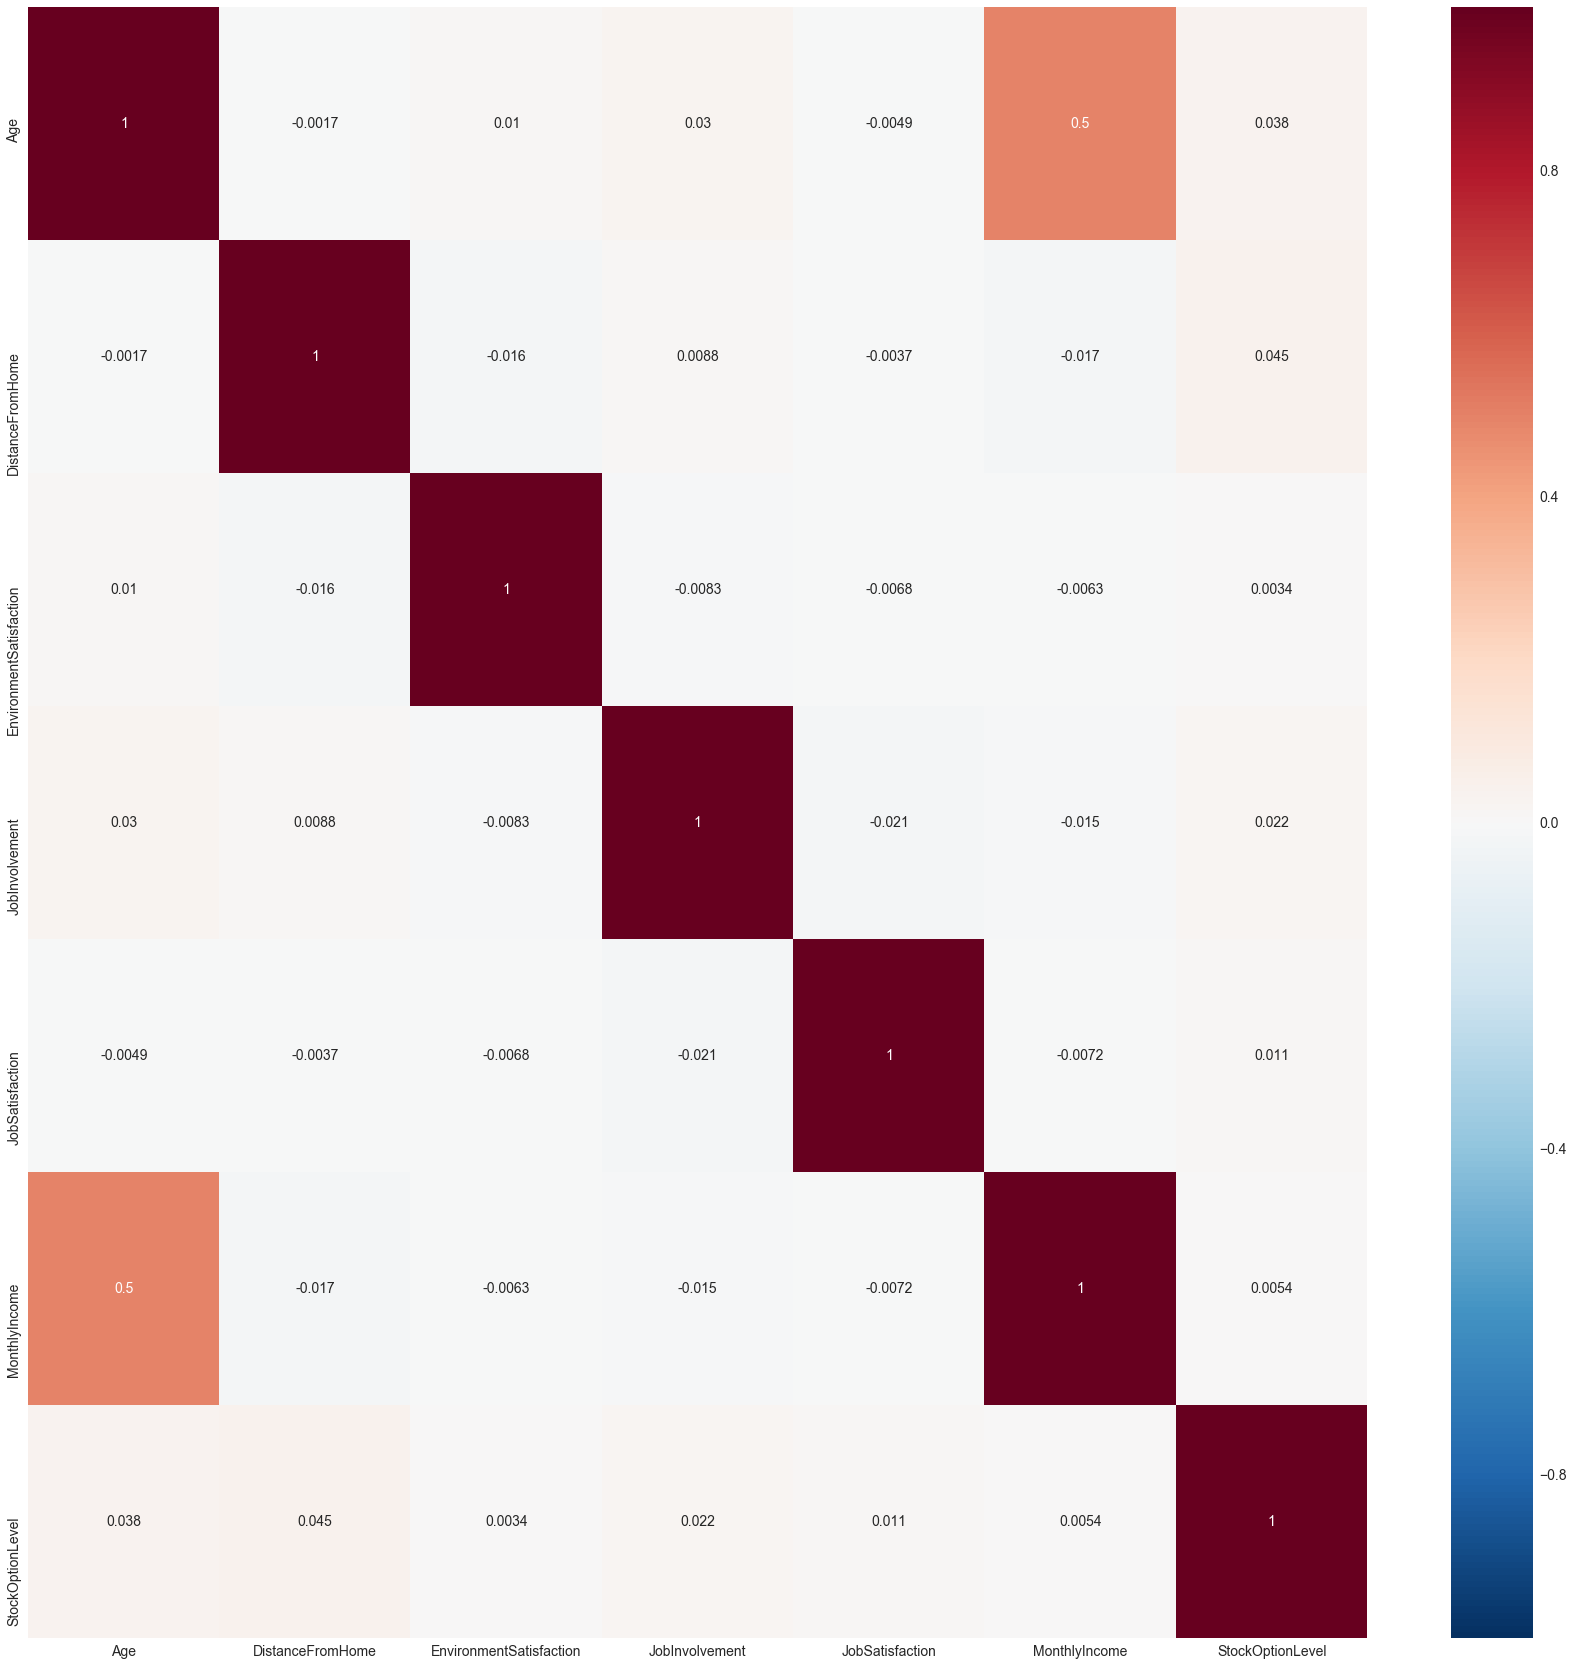

In [299]:
sns.set(font_scale=1.4)
fig, ax = plt.subplots(figsize=(30, 30))
ax = sns.heatmap(hr_sig.corr(), annot=True, annot_kws={"size": 14})
plt.show()

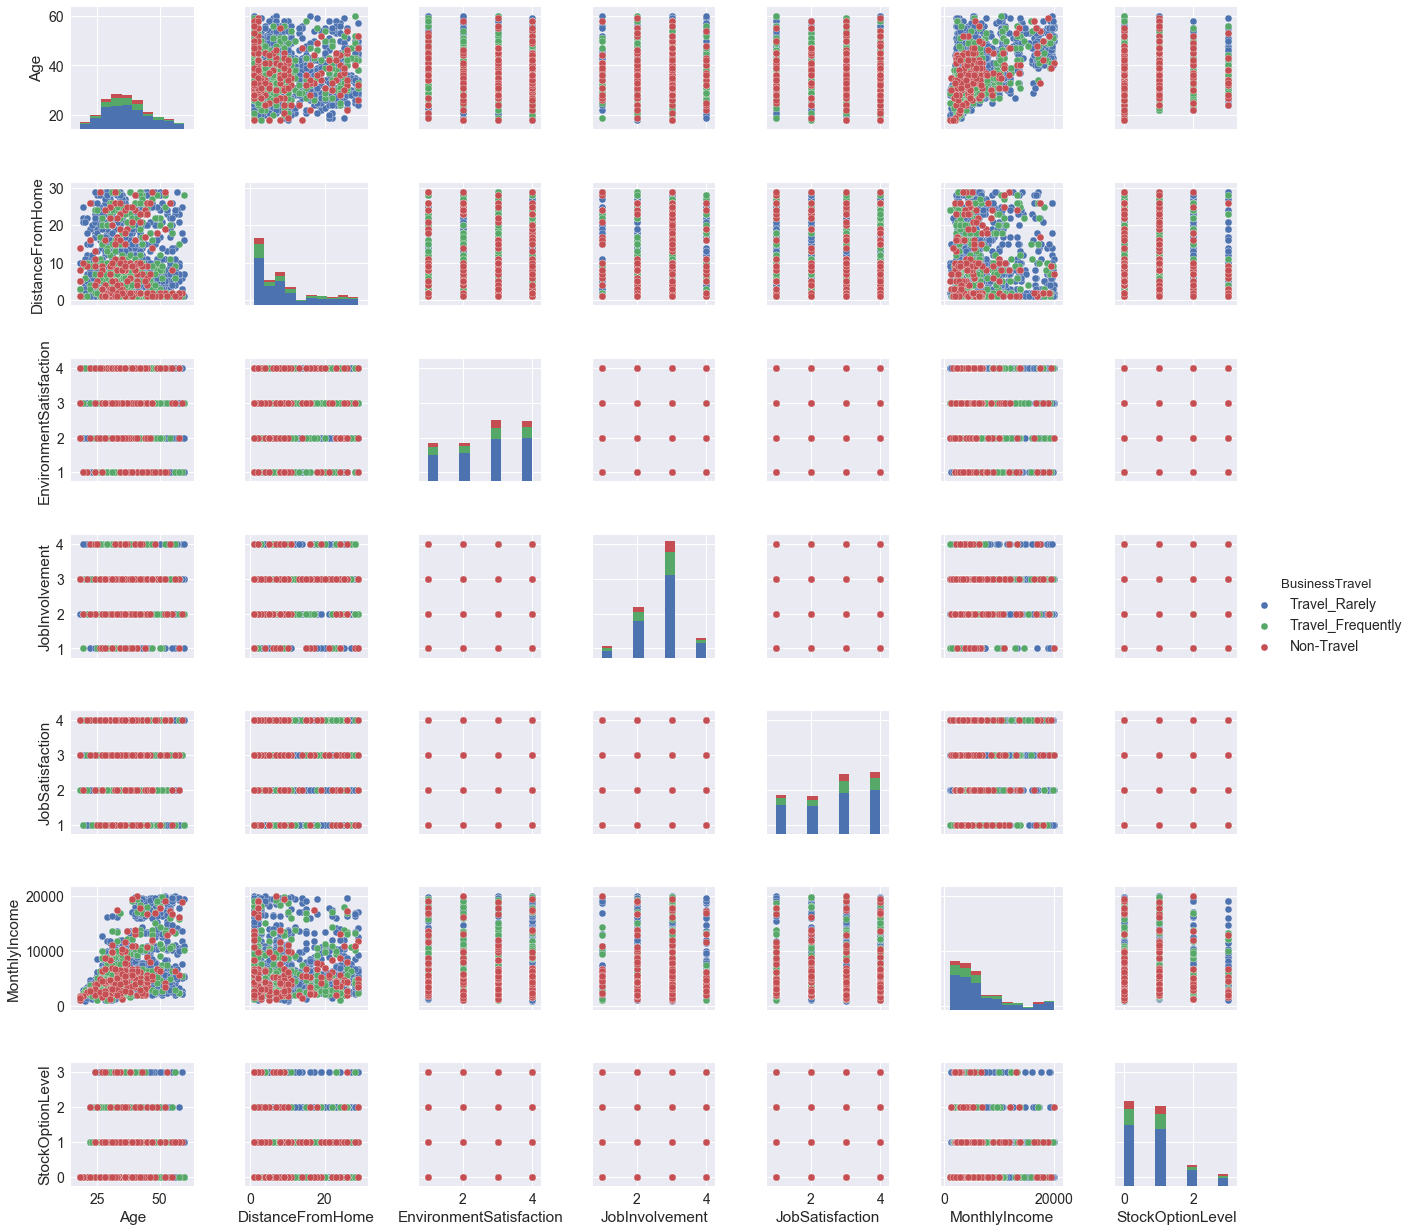

In [261]:
sns.pairplot(hr_sig, hue="BusinessTravel")

People who tend to leave: young, single, badly paid, travel frequently, in Sales, live far from home